In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


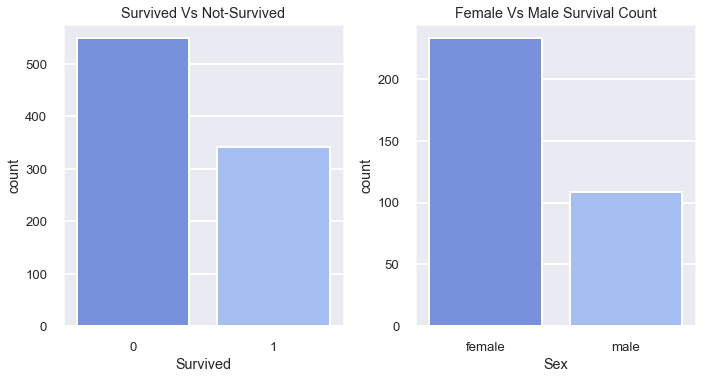

In [95]:
plt.figure(figsize=(10,5.5))
sns.set_context("poster", font_scale = .60)
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
plt.subplot(121)
sns.countplot(x='Survived',data=df)
plt.title('Survived Vs Not-Survived')
plt.subplot(122)
sns.countplot(x='Sex',data=df[df['Survived']==1])
plt.title('Female Vs Male Survival Count')
plt.tight_layout()

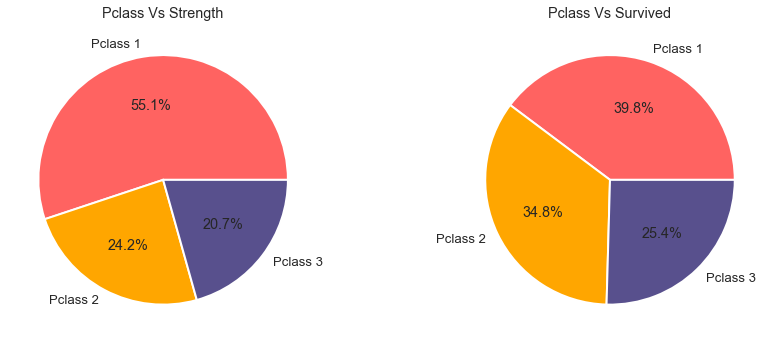

In [96]:
plt.figure(figsize=(13,5))
sns.set_palette('coolwarm')
label = ['Pclass 1','Pclass 2','Pclass 3']
plt.subplot(121)
plt.pie(df['Pclass'].value_counts(),labels = label , autopct= "%1.1f%%",colors=['#ff6361','#ffa600','#58508d'])
plt.title('Pclass Vs Strength')
plt.subplot(122)
plt.pie(df[df['Survived']==1]['Pclass'].value_counts(),labels = label,autopct= "%1.1f%%",colors=['#ff6361','#ffa600','#58508d'])  
plt.title('Pclass Vs Survived')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Parch Survived Vs Parch Not-Survived')

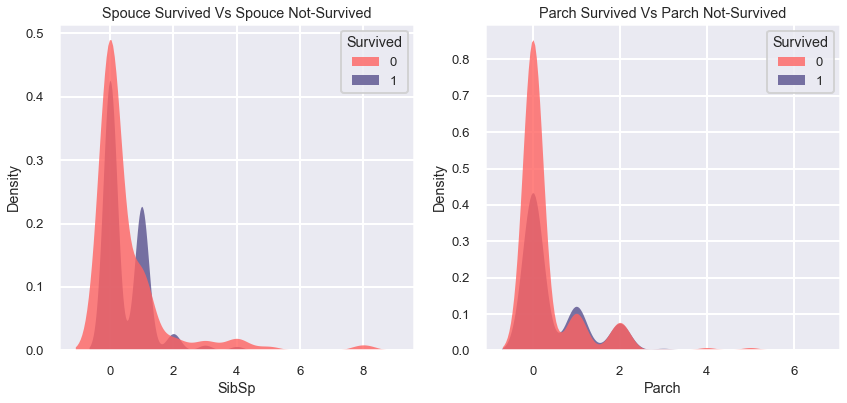

In [97]:
plt.figure(figsize=(14,6))
label1 = ['0','1','2','3','4']
plt.subplot(121)
sns.kdeplot(x='SibSp',data=df,hue='Survived',fill=True,palette=["#ff6361","#58508d"], alpha=.8, linewidth=0)
plt.title('Spouce Survived Vs Spouce Not-Survived')
plt.subplot(122)
sns.set_palette('colorblind')
sns.kdeplot(x='Parch',data=df,hue='Survived',fill=True,palette=["#ff6361","#58508d"], alpha=.8, linewidth=0)
plt.title('Parch Survived Vs Parch Not-Survived')


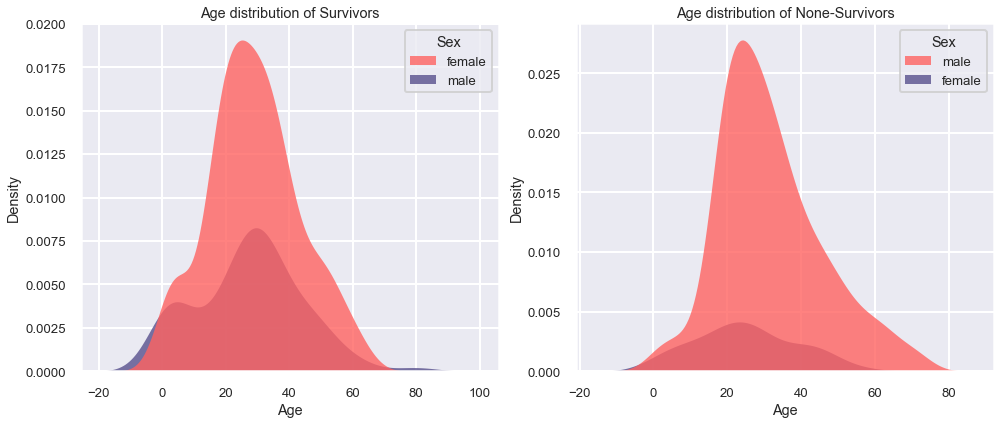

In [130]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.kdeplot(x='Age',data=df[df['Survived']==1],hue='Sex',fill=True,palette=["#ff6361","#58508d"], alpha=.8, linewidth=0)
plt.title('Age distribution of Survivors')
plt.subplot(122)
sns.kdeplot(x='Age',data=df[df['Survived']==0],hue='Sex',fill=True,palette=["#ff6361","#58508d"], alpha=.8, linewidth=0)
plt.title('Age distribution of None-Survivors')
plt.tight_layout()

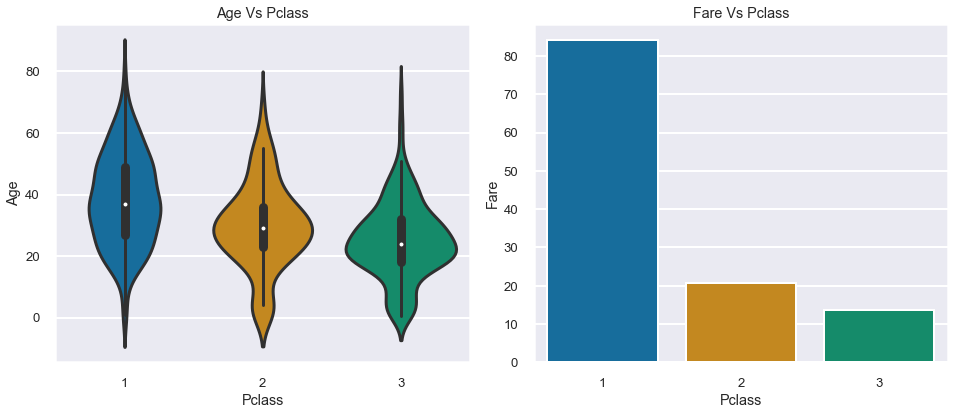

In [99]:
A = df.groupby(['Pclass'])['Fare'].mean()
A = A.reset_index()
A.columns = ['Pclass','Fare']
plt.figure(figsize=(13.5,6))
sns.set_palette('colorblind')
plt.subplot(121)
sns.violinplot(x='Pclass',y='Age',data=df)
plt.title('Age Vs Pclass')
plt.subplot(122)
sns.barplot(x='Pclass',y='Fare',data=A)
plt.title('Fare Vs Pclass')
plt.tight_layout()

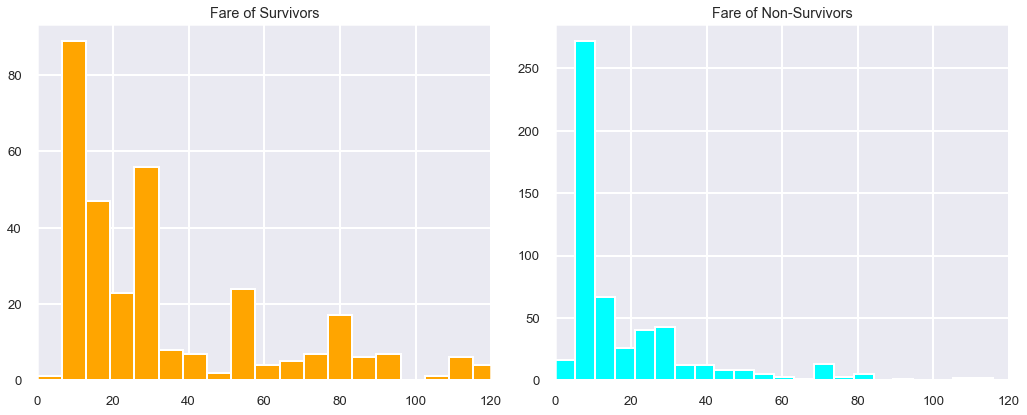

In [100]:
plt.figure(figsize=(14.5,6))
sns.set_palette('coolwarm')
plt.subplot(121)
a = df[df['Survived']==1]['Fare'].hist(bins=80,color='orange')
a.set_xlim([0,120])
plt.title('Fare of Survivors')
plt.subplot(122)
b = df[df['Survived']==0]['Fare'].hist(bins=50,color='cyan')
b.set_xlim([0,120])
plt.title('Fare of Non-Survivors')
plt.tight_layout()

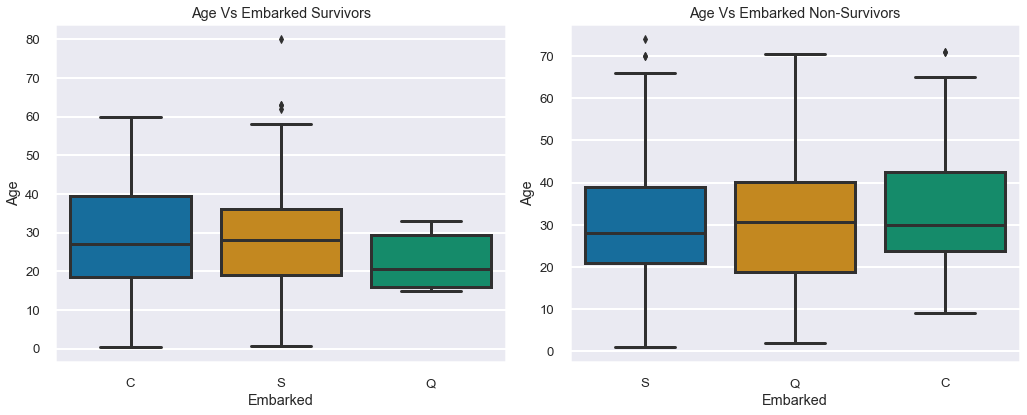

In [101]:
plt.figure(figsize=(14.5,6))
sns.set_palette('colorblind')
plt.subplot(121)
sns.boxplot(x='Embarked',y='Age',data=df[df['Survived']==1])
plt.title('Age Vs Embarked Survivors')
plt.subplot(122)
sns.boxplot(x='Embarked',y='Age',data=df[df['Survived']==0])
plt.title('Age Vs Embarked Non-Survivors')
plt.tight_layout()

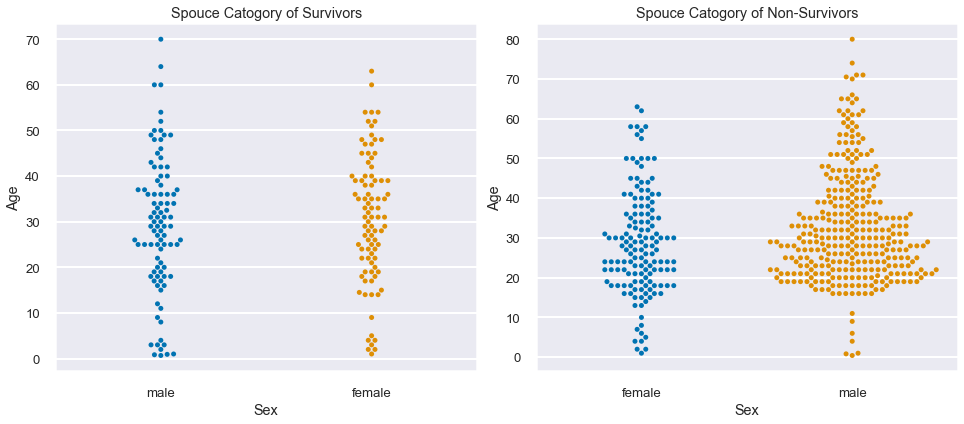

In [143]:
plt.figure(figsize=(13.5,6))
sns.set_palette('colorblind')
plt.subplot(121)
sns.swarmplot(x='Sex',y='Age',data=df[df['SibSp']==1])
plt.title('Spouce Catogory of Survivors')
plt.subplot(122)
sns.swarmplot(x='Sex',y='Age',data=df[df['SibSp']==0])
plt.title('Spouce Catogory of Non-Survivors')
plt.tight_layout()

<AxesSubplot:>

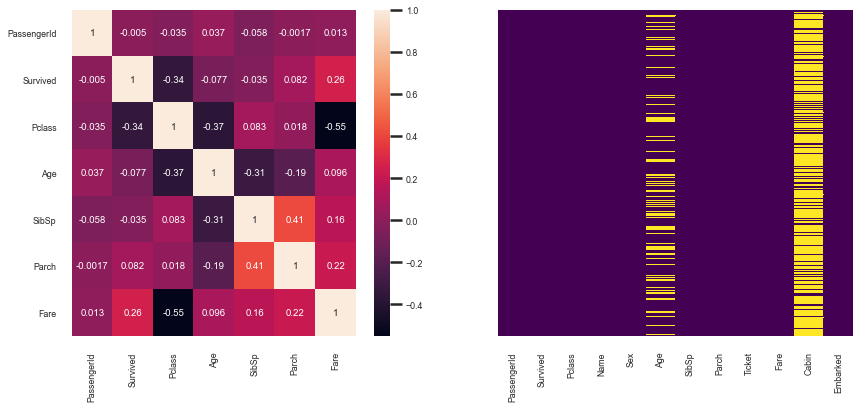

In [110]:
plt.figure(figsize=(14,6))
sns.set_context("poster", font_scale = .40)
plt.subplot(121)
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.heatmap(df.corr(),annot=True)
plt.subplot(122)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [103]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [76]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)

In [77]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [78]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [79]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [80]:
df = pd.concat([df,sex,embark],axis=1)
df.drop(['Embarked','Ticket','Sex','Name'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
df.drop('PassengerId',axis=1,inplace=True)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [48]:
#Whether passenger survived or not

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
#Random Forest

In [92]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred)*100)
k=accuracy_score(y_test,rfc_pred)*100
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

82.02247191011236


[[143  20]
 [ 28  76]]


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       163
           1       0.79      0.73      0.76       104

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



In [83]:
#KNN Algorithm
scale= StandardScaler()
scale.fit(df.drop('Survived',axis=1))
scaled_features = scale.transform(df.drop('Survived',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X = df_feat
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=101)
knn = KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('KNN Accuracy score is: ',accuracy_score(y_test,pred)*100)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN Accuracy score is:  75.73033707865169


[[207  64]
 [ 44 130]]


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       271
           1       0.67      0.75      0.71       174

    accuracy                           0.76       445
   macro avg       0.75      0.76      0.75       445
weighted avg       0.76      0.76      0.76       445



Text(0, 0.5, 'Error Rate')

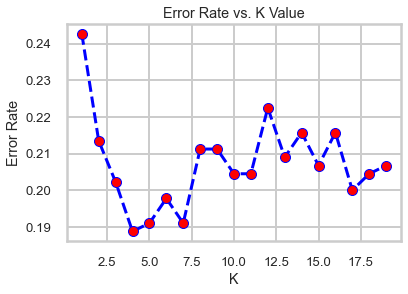

In [84]:
#Choose KNN Value
error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

sns.set_style('whitegrid')
plt.plot(range(1,20),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
#Hence we see here that at k=4 is best 

knn = KNeighborsClassifier(n_neighbors=4)
pred = knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#print('LogisticRegression score is: ',np.round(model.score(y_test,pred)*100,decimals=2))
print('\n')
print('Best KNN Accuracy score is: ',accuracy_score(y_test,pred)*100)
print('\n')
m=accuracy_score(y_test,pred)*100
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



Best KNN Accuracy score is:  81.12359550561797


[[248  23]
 [ 61 113]]


              precision    recall  f1-score   support

           0       0.80      0.92      0.86       271
           1       0.83      0.65      0.73       174

    accuracy                           0.81       445
   macro avg       0.82      0.78      0.79       445
weighted avg       0.81      0.81      0.81       445



In [88]:
#Logistic Regression
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70 ,random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print('\n')
print('Accuracy score is: ',accuracy_score(y_test,predictions)*100)
p=accuracy_score(y_test,predictions)*100

print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



Accuracy score is:  79.61476725521669


[[331  53]
 [ 74 165]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       384
           1       0.76      0.69      0.72       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.79      0.80      0.79       623



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


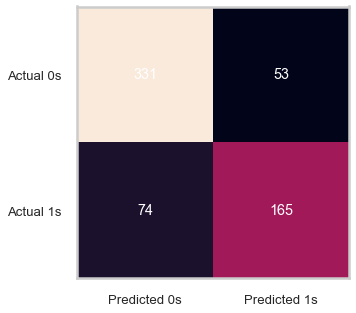

In [89]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(6, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [132]:
#Comparison

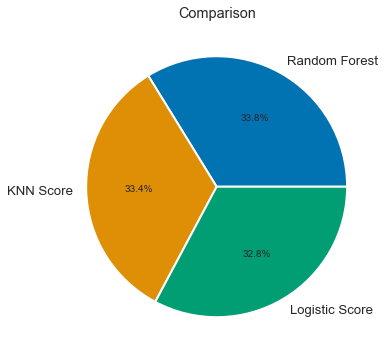

In [133]:
f = []
f.append(k)
f.append(m)
f.append(p)
plt.figure(figsize=(12,6))
label = 'Random Forest','KNN Score','Logistic Score'
plt.pie(f,labels=label,autopct= "%1.1f%%")
plt.title('Comparison')
plt.show()